https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-customer-churn/

## Challenge Description

### Predict the churn risk rate

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

- User demographic information
- Browsing behavior
- Historical purchase data among other information

It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

### Task
Your task is to predict the churn score for a website based on the features provided in the dataset.

Data description
The dataset folder contains the following files:

train.csv: 36992 x 25<br>
test.csv: 19919 x 24<br>
sample_submission.csv: 5 x 2

The columns provided in the dataset are as follows:

Column name	Description
- __customer_id__:-	Represents the unique identification number of a customer
- **Name**:-Represents the name of a customer
- **age**:- Represents the age of a customer
- **security_no**:- Represents a unique security number that is used to identify a person
- **region_category**:- Represents the region that a customer belongs to 
- **membership_category**:- Represents the category of the membership that a customer is using
- **joining_date**:- Represents the date when a customer became a member 
- **joined_through_referral**:-	Represents whether a customer joined using any referral code or ID
- **referral_id**:-  Represents a referral ID
- **preferred_offer_types**:- Represents the type of offer that a customer prefers
- **medium_of_operation**:-	Represents the medium of operation that a customer uses for transactions
- **internet_option**:-	Represents the type of internet service a customer uses
- **last_visit_time**:-	Represents the last time a customer visited the website
- **days_since_last_login**- Represents the no. of days since a customer last logged into the website
- **avg_time_spent**:- Represents the average time spent by a customer on the website
- **avg_transaction_value**:- Represents the average transaction value of a customer
- **avg_frequency_login_days**:- Represents the no. of times a customer has logged in to the website
- **points_in_wallet**:- Represents the points awarded to a customer on each transaction 
- **used_special_discount**:- Represents whether a customer uses special discounts offered
- **offer_application_preference**:- Represents whether a customer prefers offers 
- **past_complaint**:- Represents whether a customer has raised any complaints 
- **complaint_status**:- Represents whether the complaints raised by a customer was resolved 
- **feedback**-	Represents the feedback provided by a customer
- **churn_risk_score**:- Represents the churn risk score that ranges from 1 to 5

## Kaam Shuru 

### Load the required libraries

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

pd.set_option('max_columns',None) # to view total (all) columns of dataframe

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Load the Data

In [3]:
df_train=pd.read_csv('dataset/train.csv')
df_test=pd.read_csv('dataset/test.csv')

In [4]:
print('Train Data Shape: ',df_train.shape)
print('Test Data Shape: ',df_test.shape)

Train Data Shape:  (36992, 25)
Test Data Shape:  (19919, 24)


In [5]:
df_train.sample(4)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
13852,fffe43004900440032003900320031003400,Antonietta Patt,61,F,QUOOIDT,NaN,No Membership,2017-02-17,Yes,CID54484,Credit/Debit Card Offers,?,Wi-Fi,11:44:52,3,289.090000,13391.76,23.0,606.15,Yes,No,No,Not Applicable,Poor Product Quality,4
31297,fffe4300490044003900330038003600,Pattie Heatherly,12,M,GL58XW0,City,Basic Membership,2016-04-02,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,11:57:46,17,220.790000,46865.43,5.0,664.21,Yes,Yes,No,Not Applicable,No reason specified,4
20027,fffe43004900440031003900360031003200,Jena Andrews,53,F,TBK2M70,Town,Platinum Membership,2016-06-30,Yes,CID18436,Credit/Debit Card Offers,?,Mobile_Data,08:07:52,16,959.566815,11901.65,5.0,764.02,No,Yes,Yes,Solved in Follow-up,Poor Customer Service,3
26045,fffe43004900440034003500360030003400,Gertrud Schimke,51,M,7R1849X,City,Gold Membership,2017-01-01,No,xxxxxxxx,Credit/Debit Card Offers,?,Wi-Fi,04:27:17,16,102.430000,32562.23,7.0,612.58,Yes,No,No,Not Applicable,No reason specified,4


In [6]:
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [7]:
cont_features,cat_feature=divideFeatures(df_train)

### Remove columns

In [8]:
remove_col=['customer_id','Name','security_no','referral_id','last_visit_time','joining_date']
df_train=df_train.drop(remove_col,axis=1)
df_test=df_test.drop(remove_col,axis=1)

### Fill Missing/Error/? Values

In [9]:
print('Precentage of missing values ',(df_train.isna().sum()/len(df_train)*100))

Precentage of missing values  age                              0.000000
gender                           0.000000
region_category                 14.673443
membership_category              0.000000
joined_through_referral          0.000000
preferred_offer_types            0.778547
medium_of_operation              0.000000
internet_option                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 9.307418
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
dtype: float64


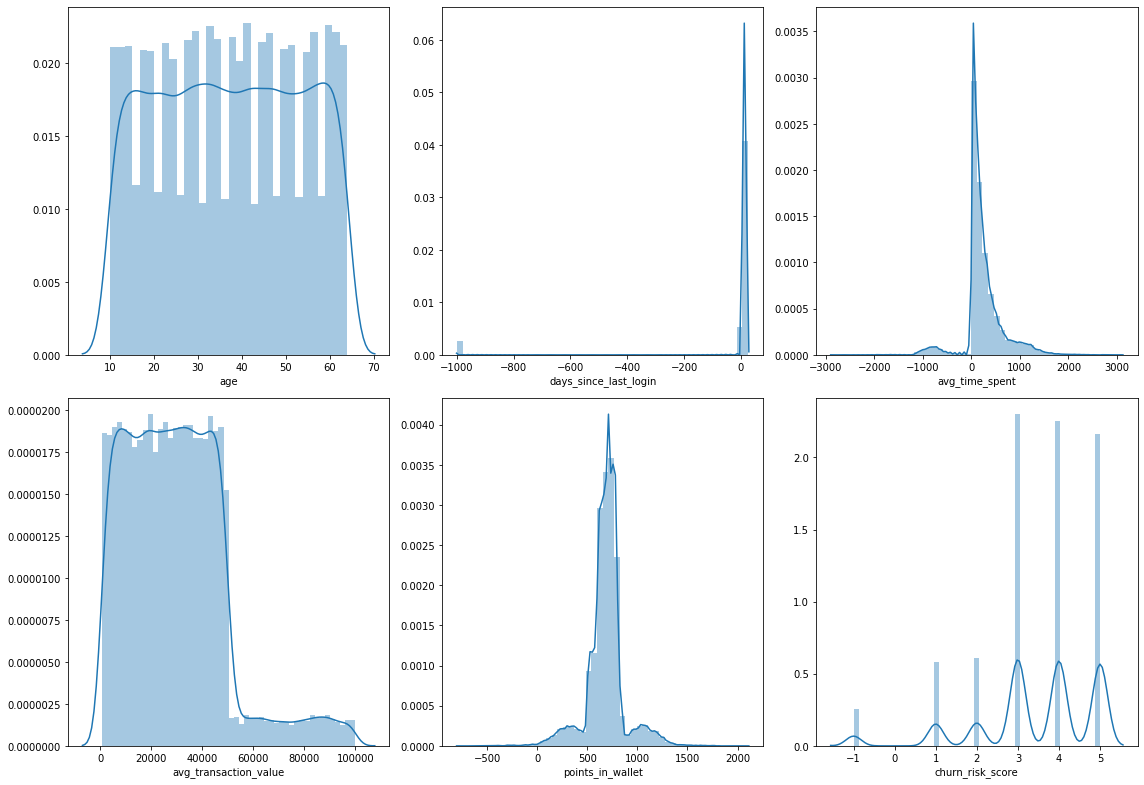

In [10]:
fig = plt.figure(figsize=(16,16))
for i in range(len(cont_features.columns)):
    fig.add_subplot(3, 3, i+1)
    sns.distplot(cont_features.dropna().iloc[:,i])
plt.tight_layout()
plt.show()

#### points_in_wallet

In [11]:
df_train['points_in_wallet']=df_train['points_in_wallet'].fillna(df_train['points_in_wallet'].mean())
df_test['points_in_wallet']=df_test['points_in_wallet'].fillna(df_train['points_in_wallet'].mean())

In [12]:
df_train['points_in_wallet'].isna().sum()

0

#### Region Category

In [13]:
df_train['region_category'].value_counts()

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

In [14]:
df_train['region_category'].isna().sum()

5428

In [15]:
df_train['region_category']=df_train['region_category'].fillna('Unknown')
df_test['region_category']=df_test['region_category'].fillna('Unknown')

#### preferred_offer_types

In [16]:
df_train['preferred_offer_types'].isna().sum()

288

In [17]:
df_train['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

In [18]:
df_train['preferred_offer_types']=df_train['preferred_offer_types'].fillna(df_train['preferred_offer_types'].mode().values[0])
df_test['preferred_offer_types']=df_test['preferred_offer_types'].fillna(df_train['preferred_offer_types'].mode().values[0])

#### Gender

In [19]:
df_train['gender'].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

In [20]:
df_train['gender']=df_train['gender'].apply(lambda x:'F' if x == 'Unknown' else x)
df_test['gender']=df_test['gender'].apply(lambda x:'F' if x == 'Unknown' else x)

#### joined_through_referral

In [21]:
df_train['joined_through_referral'].value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [22]:
df_train['joined_through_referral']=df_train['joined_through_referral'].apply(lambda x:'No' if x == '?' else x)
df_test['joined_through_referral']=df_test['joined_through_referral'].apply(lambda x:'No' if x == '?' else x)

#### Medium of Operation

In [23]:
df_train['medium_of_operation'].value_counts()

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

In [24]:

df_train['medium_of_operation']=df_train['medium_of_operation'].apply(lambda x:'Desktop' if x == '?' else x)
df_test['medium_of_operation']=df_test['medium_of_operation'].apply(lambda x:'Desktop' if x == '?' else x)

#### avg_login_frequency_days

In [25]:
df_train['avg_frequency_login_days']=df_train['avg_frequency_login_days'].apply(lambda x: 0 if x=='Error' else x)
df_train['avg_frequency_login_days']=df_train['avg_frequency_login_days'].astype('float')
df_test['avg_frequency_login_days']=df_test['avg_frequency_login_days'].apply(lambda x: 0 if x=='Error' else x)
df_test['avg_frequency_login_days']=df_test['avg_frequency_login_days'].astype('float')

In [26]:
df_train.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,17,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5


In [27]:
cont_features,cat_feature=divideFeatures(df_train)

In [28]:
cont_features

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
0,18,17,300.630000,53005.25,17.0,781.750000,2
1,32,16,306.340000,12838.38,10.0,686.882199,1
2,44,14,516.160000,21027.00,22.0,500.690000,5
3,37,11,53.270000,25239.56,6.0,567.660000,5
4,31,20,113.130000,24483.66,16.0,663.060000,5
...,...,...,...,...,...,...,...
36987,46,2,-650.682759,27277.68,6.0,639.510000,4
36988,29,13,-638.123421,11069.71,28.0,527.990000,5
36989,23,12,154.940000,38127.56,0.0,680.470000,4
36990,53,15,482.610000,2378.86,20.0,197.264414,3


In [29]:
cat_feature

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,Yes,Yes,No,Not Applicable,Products always in Stock
1,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,Yes,No,Yes,Solved,Quality Customer Care
2,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,No,Yes,Yes,Solved in Follow-up,Poor Website
3,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,No,Yes,Yes,Unsolved,Poor Website
4,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,No,Yes,Yes,Solved,Poor Website
...,...,...,...,...,...,...,...,...,...,...,...,...
36987,F,Unknown,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,No,Yes,Yes,No Information Available,No reason specified
36988,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,Yes,No,No,Not Applicable,Poor Customer Service
36989,F,Unknown,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,No,Yes,Yes,Unsolved,Poor Website
36990,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,Yes,Yes,No,Not Applicable,No reason specified


### Create dummy variables

In [30]:
df_train=pd.get_dummies(df_train,drop_first=True)
df_test=pd.get_dummies(df_test,drop_first=True)

In [31]:
df_train.shape

(36992, 38)

In [32]:
df_test.shape

(19919, 37)

## Train_test_split

In [53]:
X=df_train.drop('churn_risk_score',axis=1)
y=df_train['churn_risk_score']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
X_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,gender_M,region_category_Town,region_category_Unknown,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
3313,49,2,572.770000,19641.41,23.000000,600.540000,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0
28260,42,16,1427.643434,48511.87,26.000000,700.920000,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0
31412,10,-999,-779.419727,46612.57,11.000000,744.650000,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
6700,12,9,245.010000,95291.95,12.000000,686.882199,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
31958,28,14,308.770000,45564.89,36.926599,716.280000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [45]:
cont_features=cont_features.drop('churn_risk_score',axis=1)

KeyError: "['churn_risk_score'] not found in axis"

In [50]:
scaler=StandardScaler()
X_train[cont_features.columns] = pd.DataFrame(scaler.fit_transform(X_train[cont_features.columns]), columns=cont_features.columns)

# scale test data with transform()
X_test[cont_features.columns] = pd.DataFrame(scaler.transform(X_test[cont_features.columns]), columns=cont_features.columns)

In [55]:
scaler=StandardScaler()
X_train[cont_features.columns]=scaler.fit_transform(X_train[cont_features.columns])

In [56]:
X_train

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,gender_M,region_category_Town,region_category_Unknown,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
3313,0.750392,0.192248,0.823112,-0.498055,0.856755,-0.466487,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0
28260,0.310109,0.253363,2.962938,0.983743,1.158816,0.072848,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0
31412,-1.702613,-4.177466,-2.561542,0.886260,-0.351488,0.307807,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
6700,-1.576817,0.222806,0.002699,3.384766,-0.250801,-0.002576,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
31958,-0.570456,0.244632,0.162296,0.832487,2.258982,0.155377,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0.624597,0.253363,-0.083858,-0.009602,0.252634,1.459035,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
6265,-0.444661,0.248998,1.494016,0.189560,-1.459044,-0.543320,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
11284,-0.822047,0.244632,2.968392,0.980711,-1.459044,0.205130,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
860,-0.193071,0.288286,0.234460,-0.084070,0.252634,0.002785,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [49]:
scaler=StandardScaler()
pd.DataFrame(scaler.fit_transform(X_train[cont_features.columns]), columns=cont_features.columns)

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
0,0.750392,0.192248,0.823112,-0.498055,0.856755,-0.466487
1,0.310109,0.253363,2.962938,0.983743,1.158816,0.072848
2,-1.702613,-4.177466,-2.561542,0.886260,-0.351488,0.307807
3,-1.576817,0.222806,0.002699,3.384766,-0.250801,-0.002576
4,-0.570456,0.244632,0.162296,0.832487,2.258982,0.155377
...,...,...,...,...,...,...
29588,0.624597,0.253363,-0.083858,-0.009602,0.252634,1.459035
29589,-0.444661,0.248998,1.494016,0.189560,-1.459044,-0.543320
29590,-0.822047,0.244632,2.968392,0.980711,-1.459044,0.205130
29591,-0.193071,0.288286,0.234460,-0.084070,0.252634,0.002785


In [47]:
scaler=StandardScaler()
cont_scaled=scaler.fit_transform(X_train[cont_features.columns])

In [48]:
pd.DataFrame(cont_scaled)

,0,1,2,3,4,5
0,0.750392,0.192248,0.823112,-0.498055,0.856755,-0.466487
1,0.310109,0.253363,2.962938,0.983743,1.158816,0.072848
2,-1.702613,-4.177466,-2.561542,0.886260,-0.351488,0.307807
3,-1.576817,0.222806,0.002699,3.384766,-0.250801,-0.002576
4,-0.570456,0.244632,0.162296,0.832487,2.258982,0.155377
...,...,...,...,...,...,...
29588,0.624597,0.253363,-0.083858,-0.009602,0.252634,1.459035
29589,-0.444661,0.248998,1.494016,0.189560,-1.459044,-0.543320
29590,-0.822047,0.244632,2.968392,0.980711,-1.459044,0.205130
29591,-0.193071,0.288286,0.234460,-0.084070,0.252634,0.002785


In [85]:
X_train_scaled

array([[ 0.75039238,  0.19224825,  0.82311208, ..., -0.20144001,
         2.20902543, -0.1981477 ],
       [ 0.31010944,  0.25336314,  2.96293826, ..., -0.20144001,
        -0.45268831, -0.1981477 ],
       [-1.70261253, -4.17746633, -2.56154215, ..., -0.20144001,
         2.20902543, -0.1981477 ],
       ...,
       [-0.82204667,  0.24463244,  2.96839151, ..., -0.20144001,
        -0.45268831, -0.1981477 ],
       [-0.19307105,  0.28828593,  0.23446012, ..., -0.20144001,
         2.20902543, -0.1981477 ],
       [-1.01073935,  0.19224825, -0.15492075, ..., -0.20144001,
        -0.45268831, -0.1981477 ]])